## Librerias

In [1]:
import re
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder

## Importo Dataset

In [3]:
from seaborn import load_dataset 
penguins = load_dataset ("penguins") 
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Entendiendo los datos

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
print(penguins.shape)

(344, 7)


In [6]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [7]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
penguins.duplicated().sum()

0

<AxesSubplot:xlabel='species', ylabel='count'>

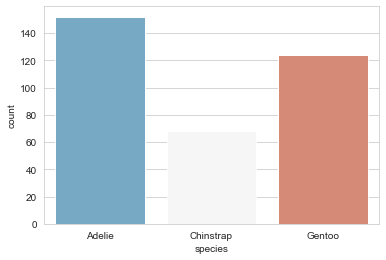

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='species',data=penguins,palette='RdBu_r')

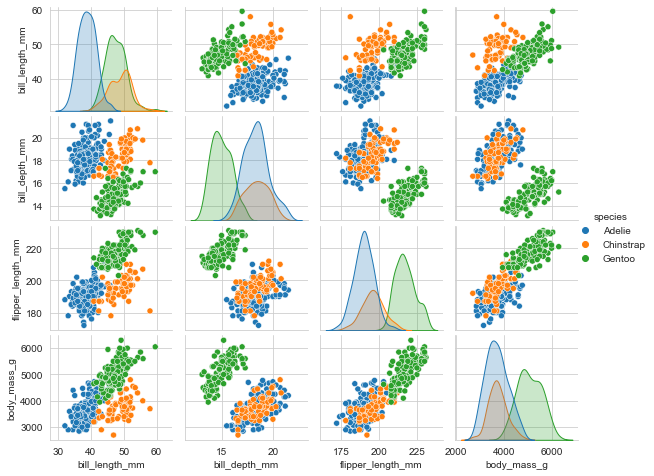

In [10]:
pairplot_figure = sns.pairplot(penguins, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

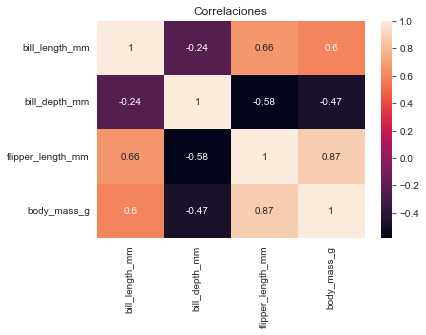

In [11]:
sns.heatmap(penguins.corr(), annot=True)
plt.title('Correlaciones')
plt.show()

## Tratamiento de Datos

In [12]:
from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
penguins.iloc[:,:] = imputer.fit_transform(penguins)

In [13]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
lb = LabelEncoder()
penguins["sex"] = lb.fit_transform(penguins["sex"])
penguins['sex'][:5]

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int32

In [15]:
lb = LabelEncoder()
penguins["island"] = lb.fit_transform(penguins["island"])
penguins['island'][:50]

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: island, dtype: int32

In [16]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
3,Adelie,2,41.1,17.0,190.0,3800.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...
339,Gentoo,0,41.1,17.0,190.0,3800.0,1
340,Gentoo,0,46.8,14.3,215.0,4850.0,0
341,Gentoo,0,50.4,15.7,222.0,5750.0,1
342,Gentoo,0,45.2,14.8,212.0,5200.0,0


In [17]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [18]:
x = penguins[penguins.columns.drop("species")]
y = penguins["species"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
print(x_train)

     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
219       1            50.2           18.7              198.0       3775.0   
271       0            48.5           14.1              220.0       5300.0   
266       0            45.5           13.9              210.0       4200.0   
335       0            55.1           16.0              230.0       5850.0   
217       1            49.6           18.2              193.0       3775.0   
..      ...             ...            ...                ...          ...   
323       0            49.1           15.0              228.0       5500.0   
192       1            49.0           19.5              210.0       3950.0   
117       2            37.3           20.5              199.0       3775.0   
47        1            37.5           18.9              179.0       2975.0   
172       1            42.4           17.3              181.0       3600.0   

     sex  
219    0  
271    1  
266    0  
335    1  
217    1

### Escalamiento de columnas

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [22]:
x_train.shape

(240, 6)

In [23]:
x_test.shape

(104, 6)

# Modelos

In [24]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

In [25]:
def modelo_entrenamiento(X_train, y_train, X_test, y_test, clf):
    #clf = clf.copy()  
    
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    # training confusion matrix
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp

In [26]:
linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
knn_clf = KNeighborsClassifier (n_neighbors=1)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(max_depth=3)

clf = linear_clf

## Gradiente Descendente estocástica

SGDClassifier
Accuracy Train:  1.0
Accuracy Test:  0.9615384615384616


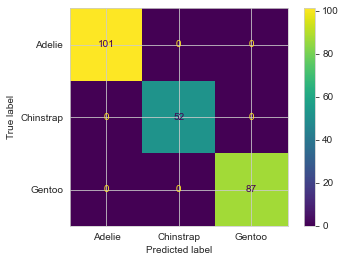

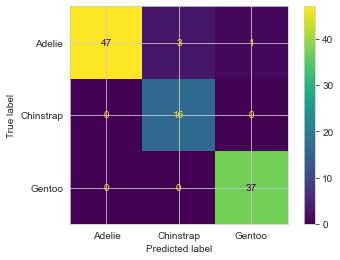

In [27]:
modelo_entrenamiento(x_train, y_train, x_test, y_test, linear_clf)

## Árbol de decisión

DecisionTreeClassifier
Accuracy Train:  0.9958333333333333
Accuracy Test:  0.9711538461538461


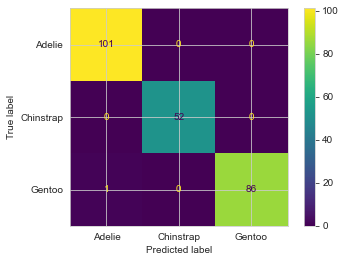

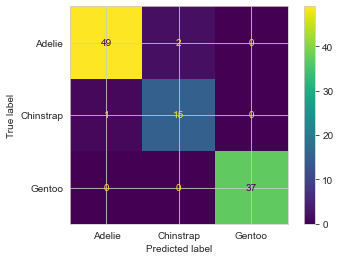

In [28]:
modelo_entrenamiento(x_train, y_train, x_test, y_test, DecisionTreeClassifier(max_depth=5))

## Vecinos cercanos

KNeighborsClassifier
Accuracy Train:  0.9958333333333333
Accuracy Test:  0.9807692307692307


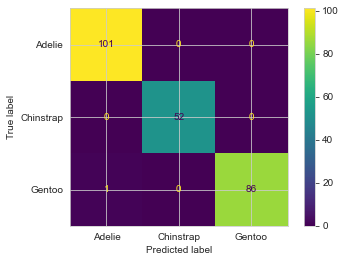

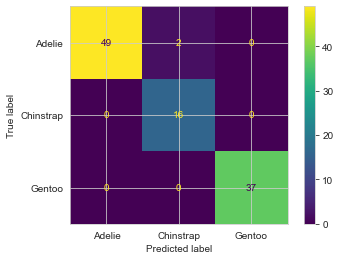

In [29]:
modelo_entrenamiento(x_train, y_train, x_test, y_test, KNeighborsClassifier (n_neighbors=2))

## Random Forest

RandomForestClassifier
Accuracy Train:  1.0
Accuracy Test:  0.9903846153846154


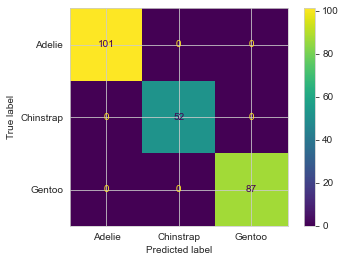

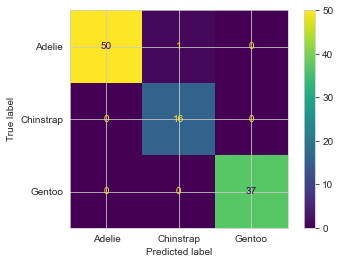

In [30]:
modelo_entrenamiento(x_train, y_train, x_test, y_test, RandomForestClassifier(max_depth=7))